In [1]:
import numpy as np
import os

In [2]:
# 노트북 실행 결과를 동일하게 만들기 위해서
np.random.seed(42)

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

In [4]:
# 불필요한 경고를 무시
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

4.1.1 정규 방정식
--

In [5]:
import numpy as np

In [6]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

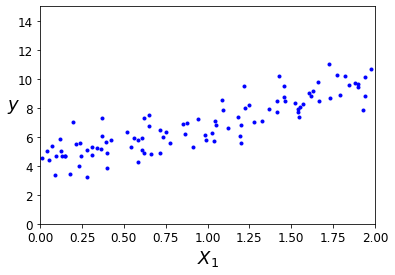

In [7]:
plt.plot(X, y, "b.")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

식 4-4: 정규 방정식

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [8]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1 을 추가합니다
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best

array([[4.21509616],
       [2.77011339]])


$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [10]:
X_new = np.array([[0], [2]])

In [11]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1을 추가합니다

In [12]:
y_predict = X_new_b.dot(theta_best)

In [13]:
y_predict

array([[4.21509616],
       [9.75532293]])

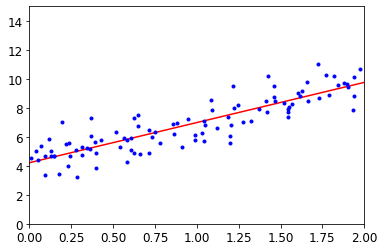

In [14]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lin_reg = LinearRegression()

In [17]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [19]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

LinearRegression 클래스는 scipy.linalg.lstsq() 함수를 기반으로 함

In [20]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [21]:
theta_best_svd

array([[4.21509616],
       [2.77011339]])

$\boldsymbol{\hat{\theta}} = \mathbf{X}^+\mathbf{y}$ 계산

 $\mathbf{X}^{+}$는 $\mathbf{X}$의 유사역행렬 (pseudoinverse) => np.linalg.pinv()함수를 사용해 구할 수 있다.
 
$\boldsymbol{\hat{\theta}} = \mathbf{X}^{-1}\hat{y}$

np.linalg.pinv(X_b).dot(y)

4.2 경사 하강법
--